# OASIS INFOBYTE INTERNSHIP
# Task_NO- 3. CAR PRICE
# NAME - DEVARAJA RAO ENDUGA
# INTERNSHIP - DATA SCIENCE

# IMPORT LIABRARIES

In [1]:
import pandas as pd
import numpy as np

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import Lasso
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

# READING THE DATASET

In [9]:
df = pd.read_csv('CarPrice_Assignment.csv')
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [10]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [11]:
df.tail()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0
204,205,-1,volvo 264gl,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,19,25,22625.0


In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

# CHECK FOR ALL NULL VALUES

In [13]:
df.isna().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [15]:
df.describe(include='all')

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205,205,205,205,205,205,205,205.000000,...,205.000000,205,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
unique,NaN,NaN,147,2,2,2,5,3,2,NaN,...,NaN,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,toyota corona,gas,std,four,sedan,fwd,front,NaN,...,NaN,mpfi,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,6,185,168,115,96,120,202,NaN,...,NaN,94,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,103.000000,0.834146,NaN,NaN,NaN,NaN,NaN,NaN,NaN,98.756585,...,126.907317,NaN,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.021776,...,41.642693,NaN,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,86.600000,...,61.000000,NaN,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,94.500000,...,97.000000,NaN,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,97.000000,...,120.000000,NaN,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,102.400000,...,141.000000,NaN,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000


# CHECKING THE DISTRIBUTION OF CATEGORICAL DATA

In [17]:
print(df.fueltype.value_counts())
print(df.aspiration.value_counts())
print(df.doornumber.value_counts())
print(df.carbody.value_counts())
print(df.drivewheel.value_counts())
print(df.enginelocation.value_counts())
print(df.fuelsystem.value_counts())

fueltype
gas       185
diesel     20
Name: count, dtype: int64
aspiration
std      168
turbo     37
Name: count, dtype: int64
doornumber
four    115
two      90
Name: count, dtype: int64
carbody
sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: count, dtype: int64
drivewheel
fwd    120
rwd     76
4wd      9
Name: count, dtype: int64
enginelocation
front    202
rear       3
Name: count, dtype: int64
fuelsystem
mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: count, dtype: int64


# RELATIONSHIP BETWEEN CAR NAME & CAR PRICE

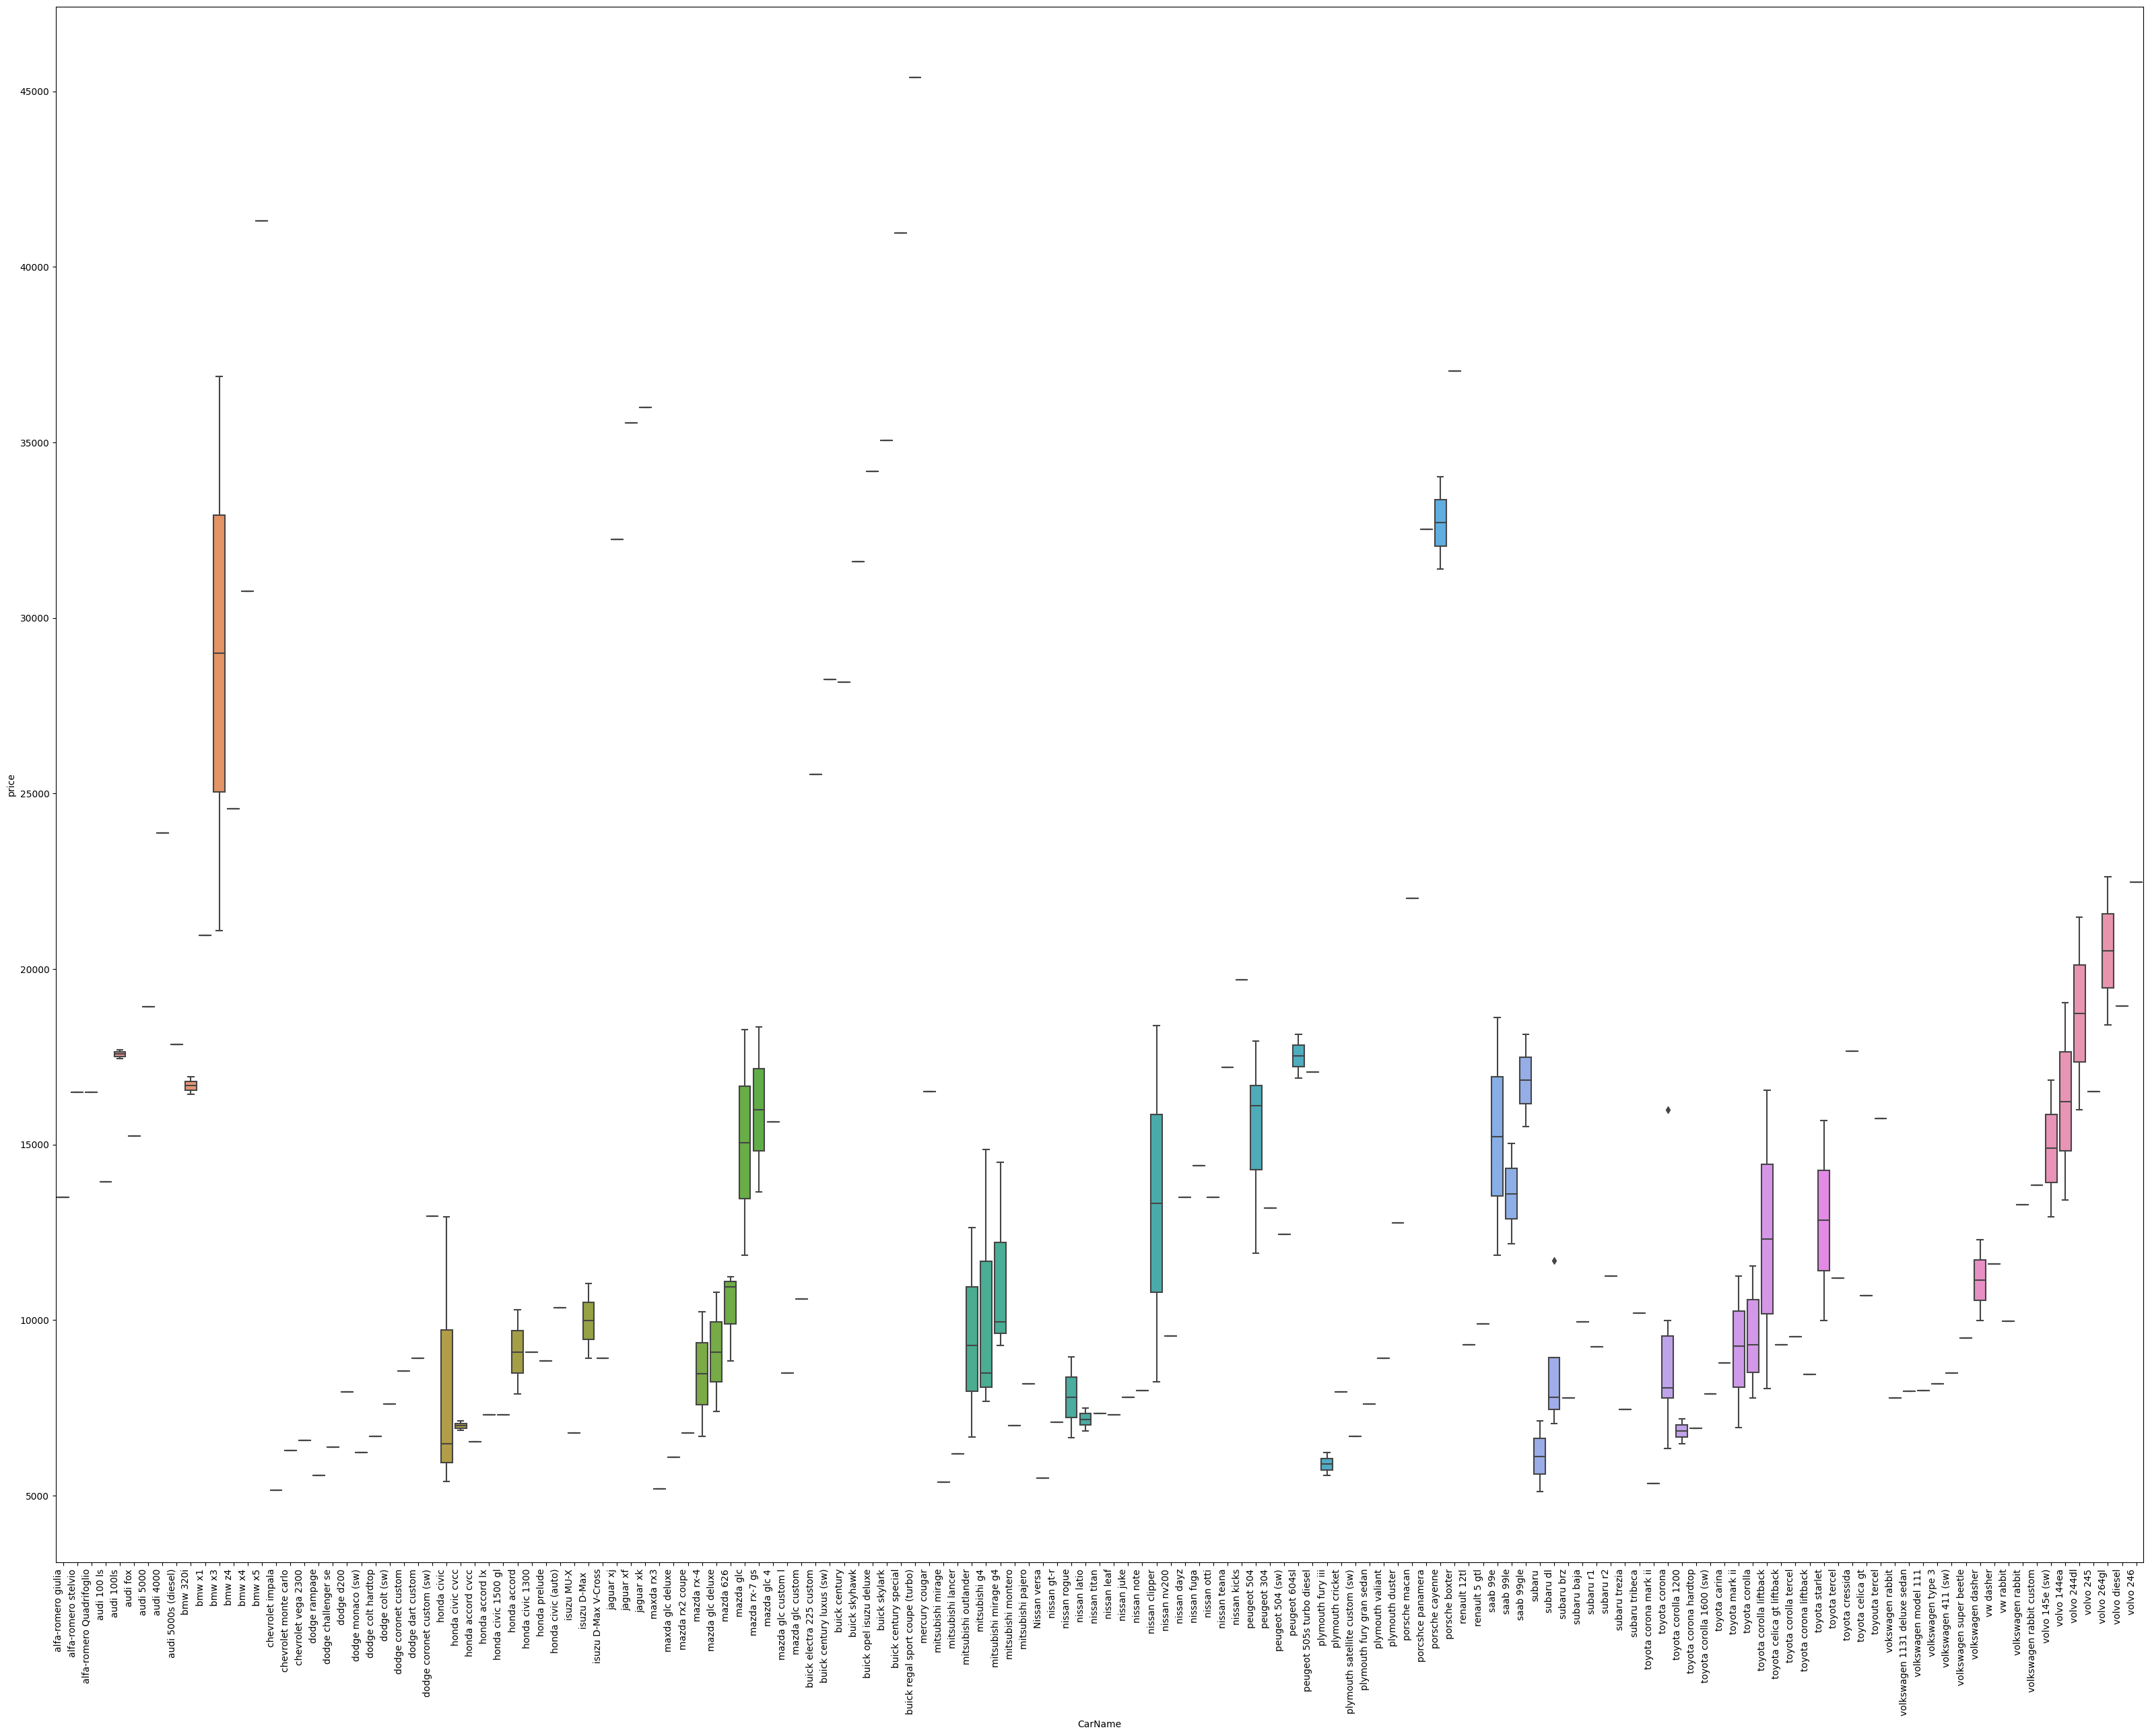

In [18]:
plt.subplots(figsize=(40,30))
ax=sns.boxplot(x='CarName', y='price', data= df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()


# RELATIONSHIP BETWEEN FUELTYPE & PRICE

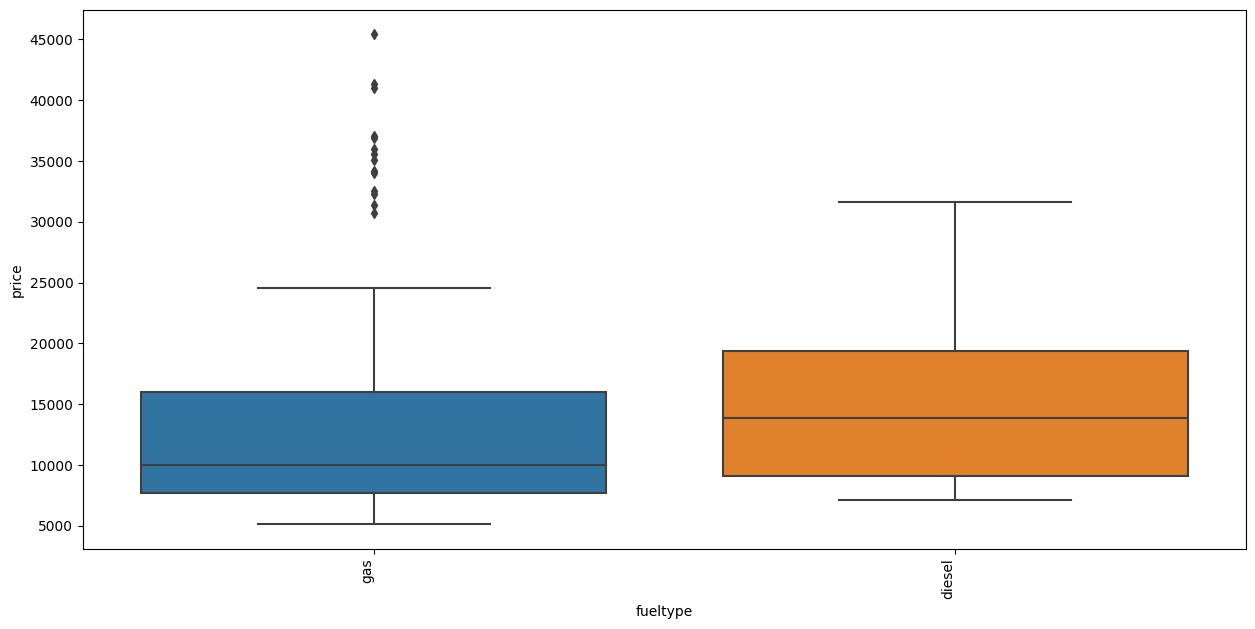

In [19]:
plt.subplots(figsize=(15,7))
ax=sns.boxplot(x='fueltype', y='price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()


# RELATIONSHIP BETWEEN FUELSYSTEM & PRICE

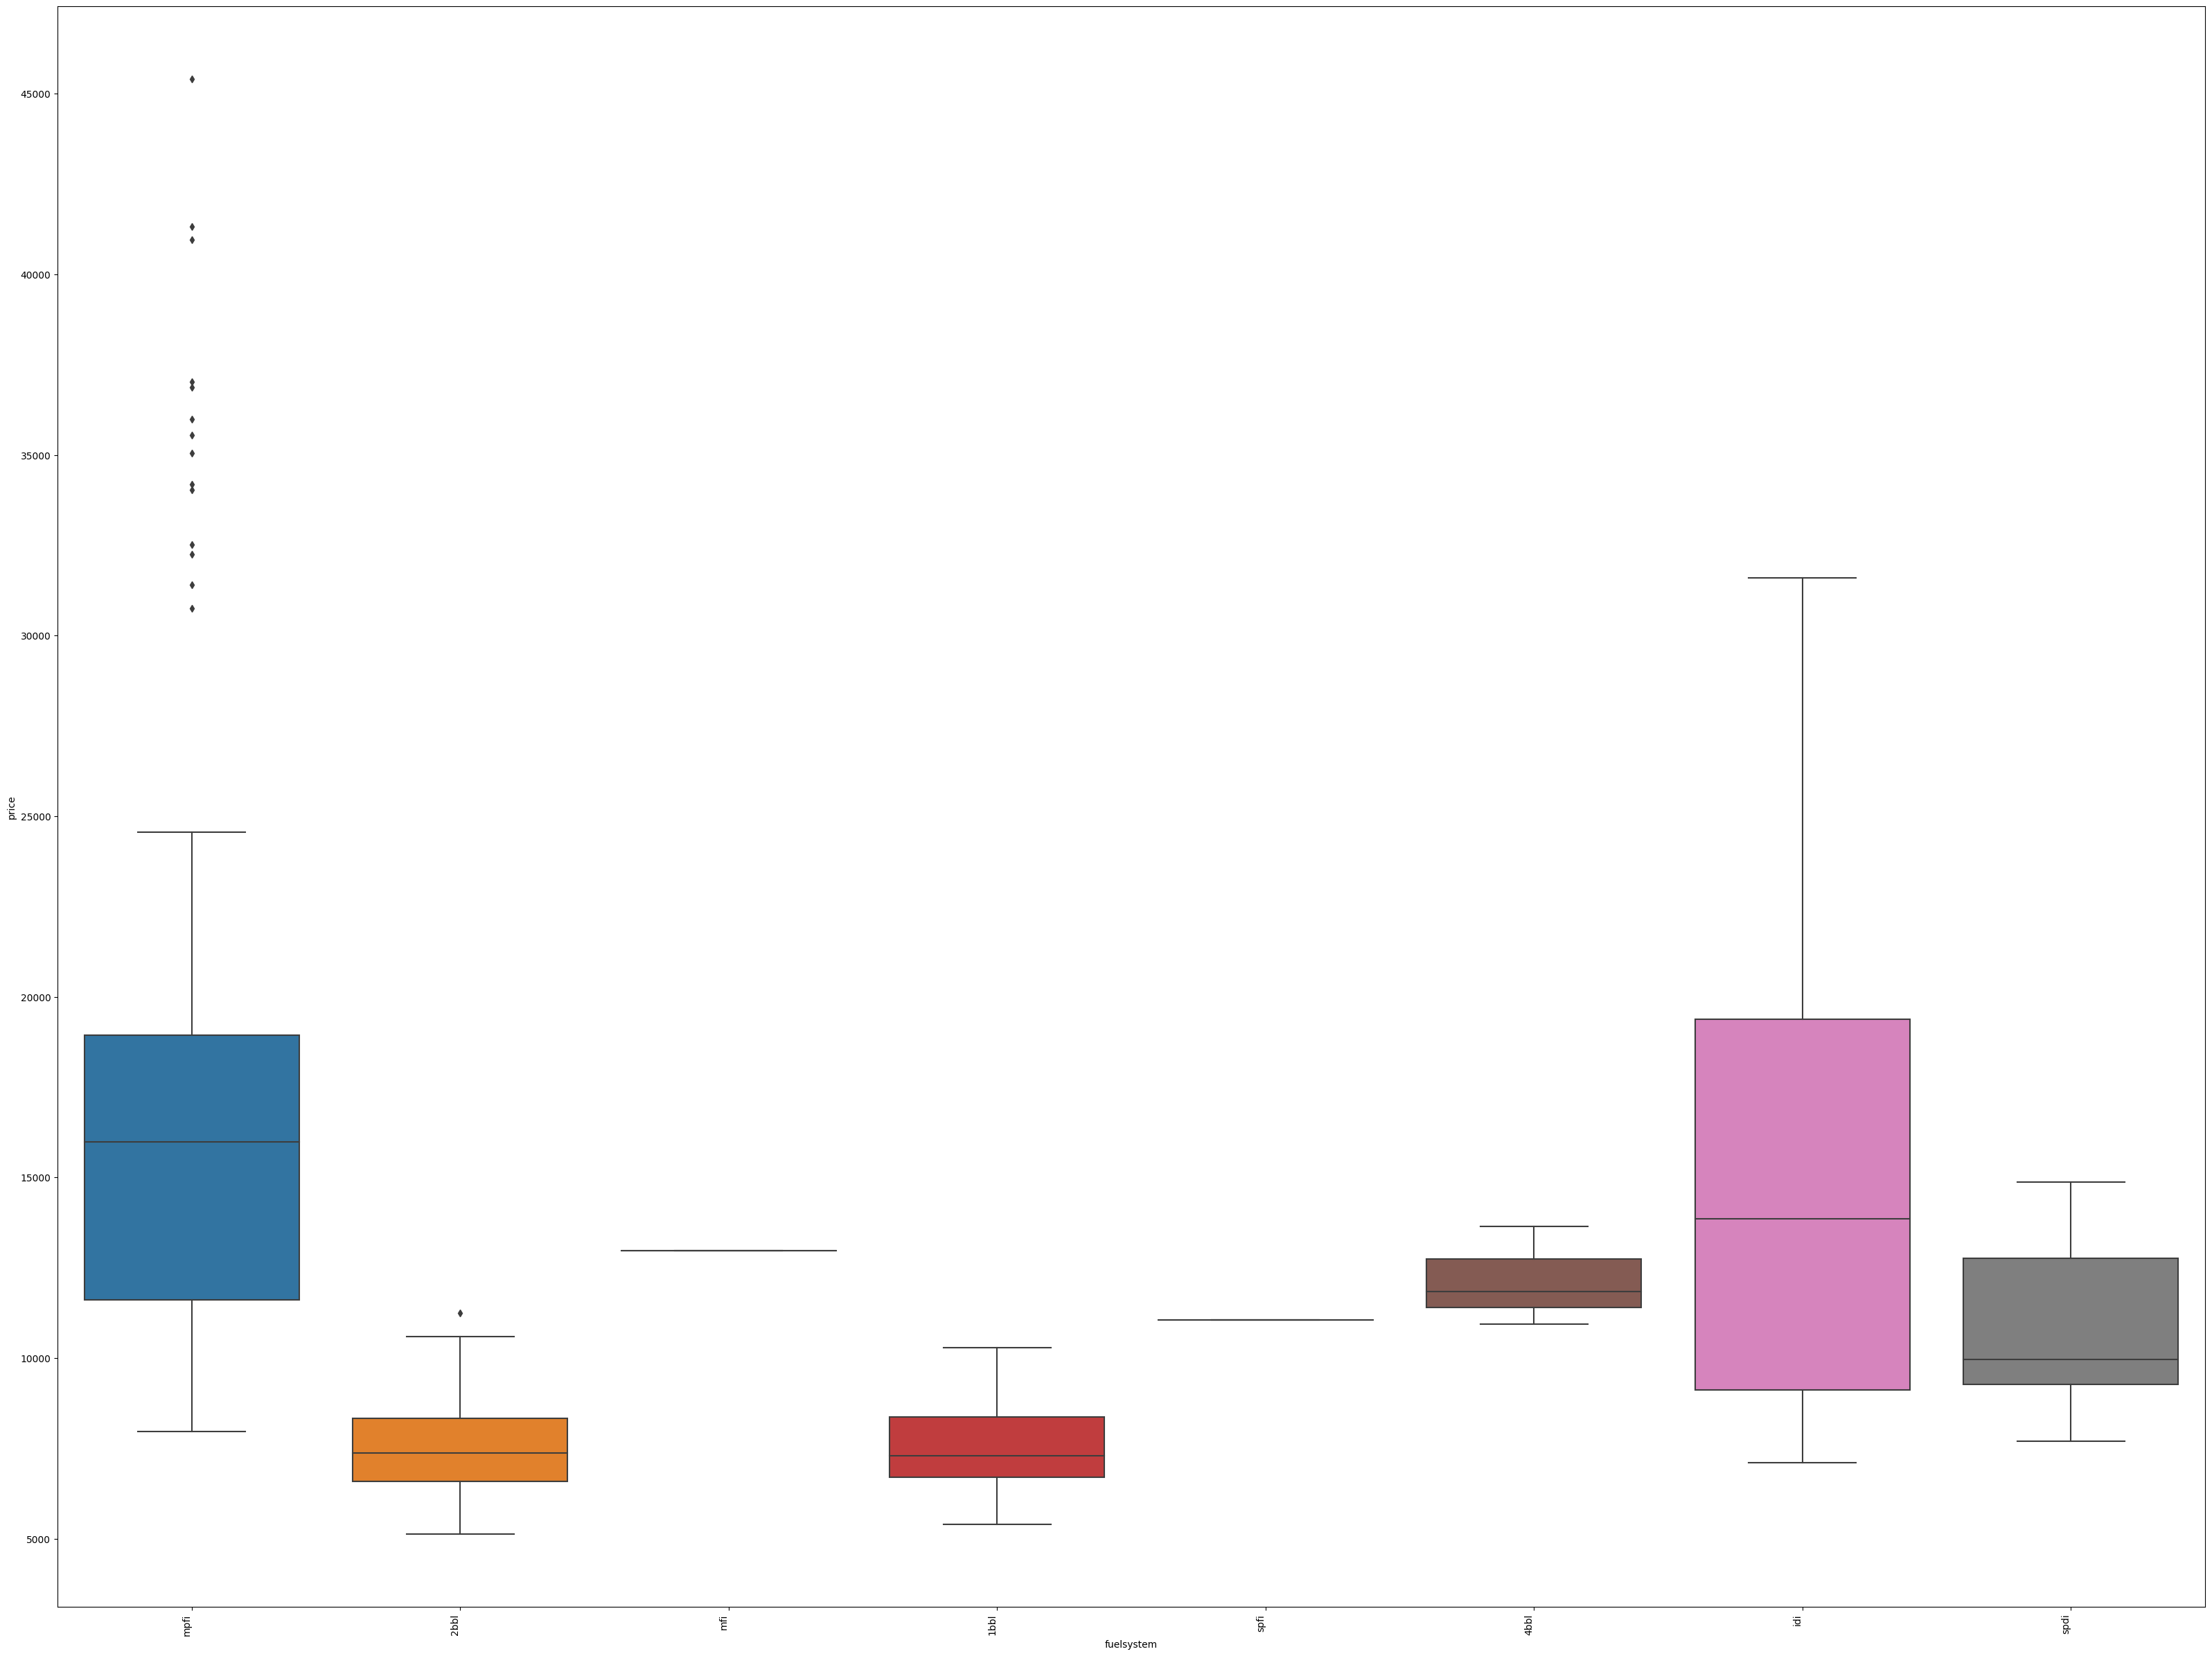

In [20]:
plt.subplots(figsize=(40,30))
ax=sns.boxplot(x='fuelsystem', y='price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

# RELATIONSHIP BETWEEN ASPIRATION & PRICE

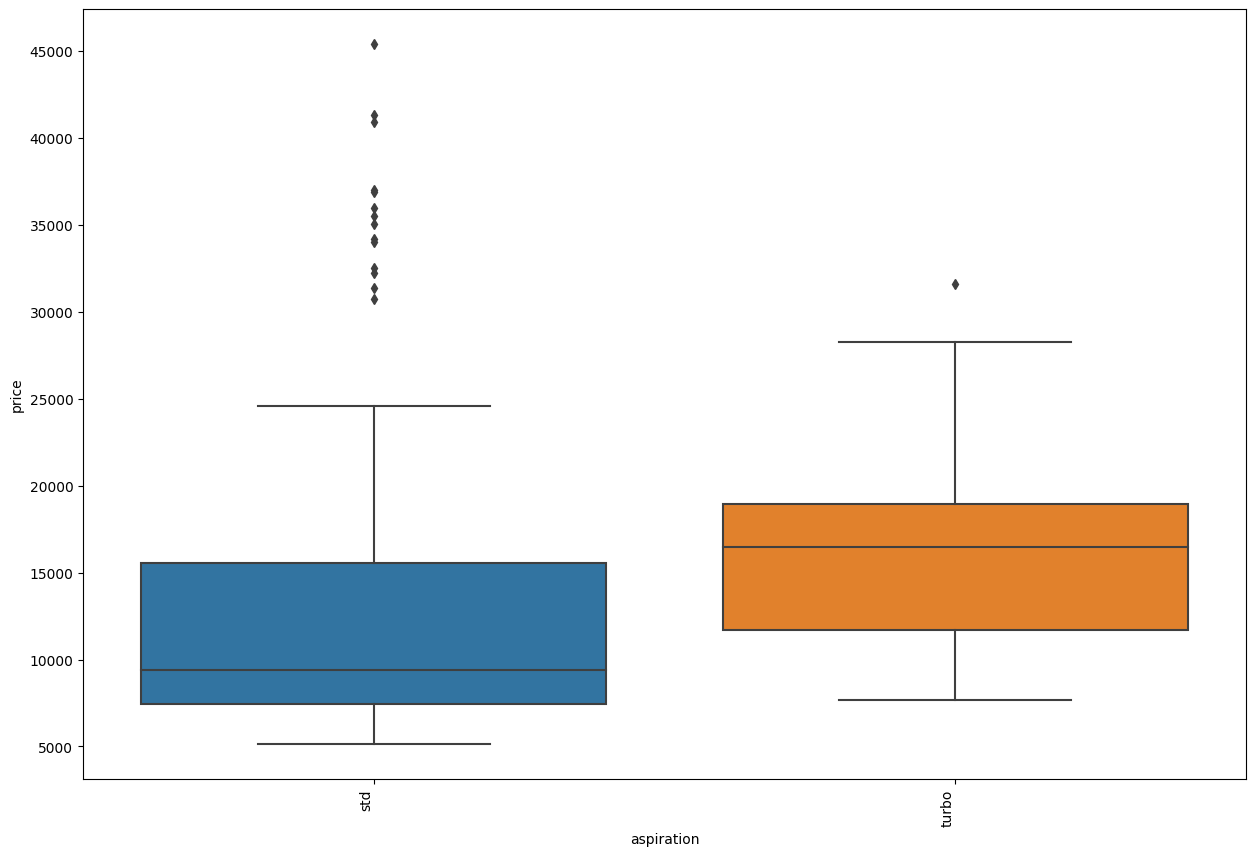

In [21]:
plt.subplots(figsize=(15,10))
ax=sns.boxplot(x='aspiration', y='price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

# RELATIONSHIP BETWEEN STROKE & PRICE

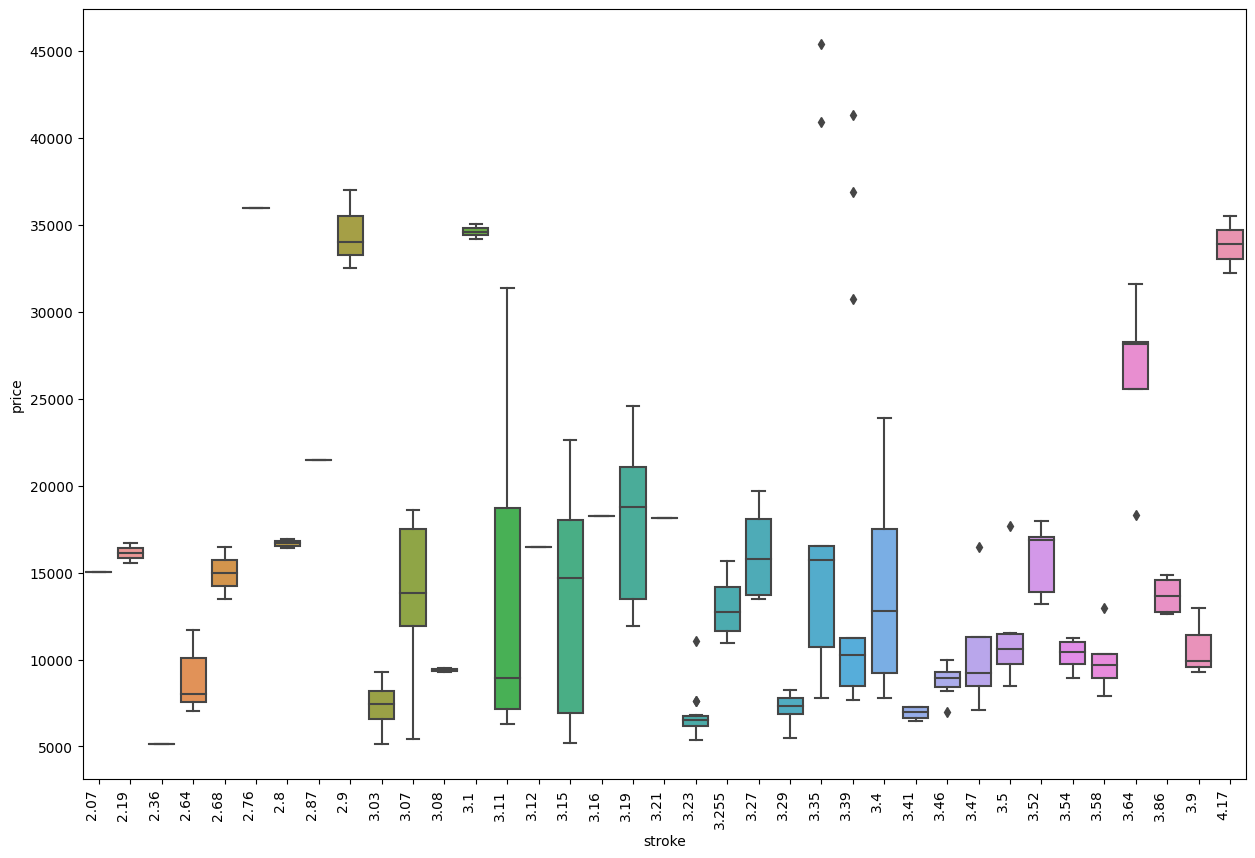

In [22]:
plt.subplots(figsize=(15,10))
ax=sns.boxplot(x='stroke', y='price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()

# RELATIONSHIP BETWEEN DRIVEWHEEL & PRICE
# SPLITTING THE DATASET INTO TRAINING & TESTING

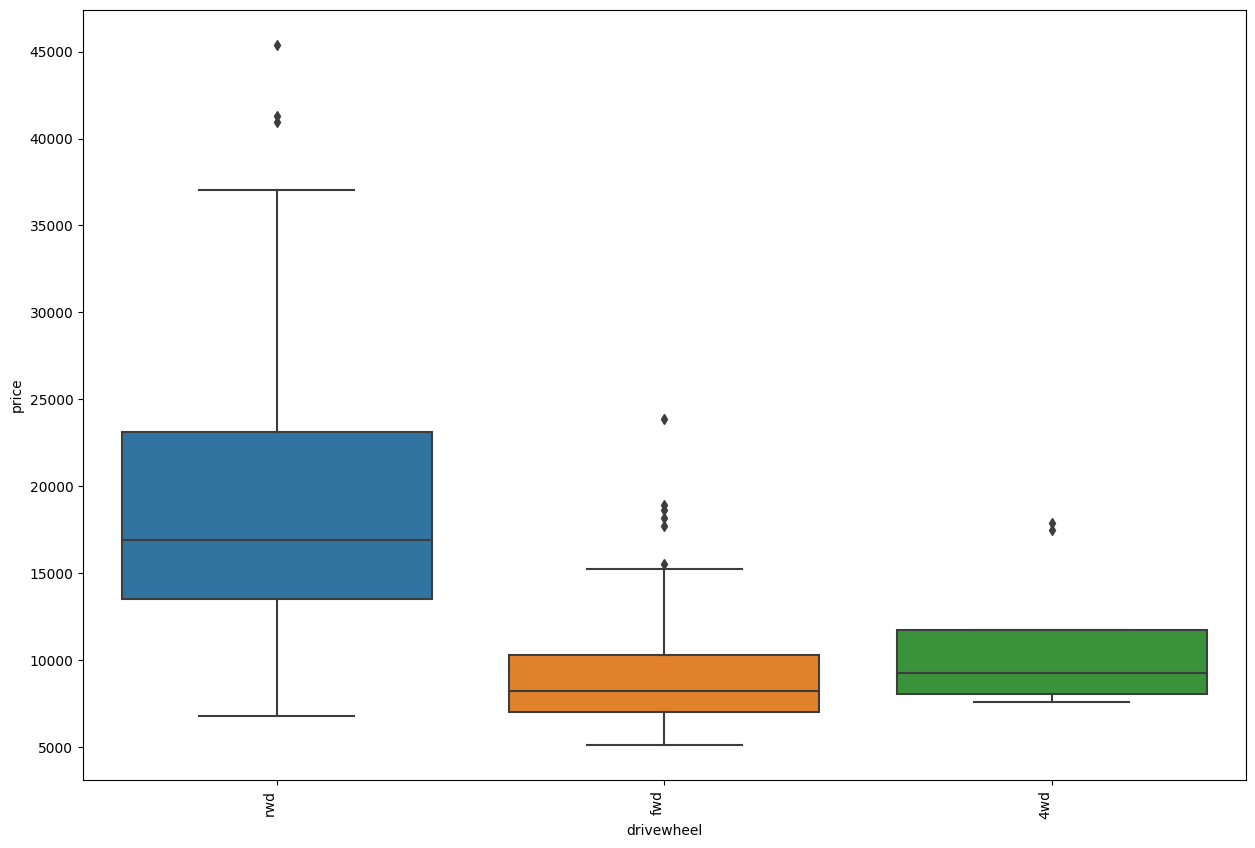

In [23]:
plt.subplots(figsize=(15,10))
ax=sns.boxplot(x='drivewheel', y='price', data=df)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90, ha='right')
plt.show()


In [24]:
df = pd.get_dummies(df, columns = ['fueltype', 'aspiration', 'doornumber', 'carbody', 'drivewheel', 'cylindernumber', 'enginelocation', 'enginetype','fuelsystem'])
print(df)

     car_ID  symboling                   CarName  wheelbase  carlength   
0         1          3        alfa-romero giulia       88.6      168.8  \
1         2          3       alfa-romero stelvio       88.6      168.8   
2         3          1  alfa-romero Quadrifoglio       94.5      171.2   
3         4          2               audi 100 ls       99.8      176.6   
4         5          2                audi 100ls       99.4      176.6   
..      ...        ...                       ...        ...        ...   
200     201         -1           volvo 145e (sw)      109.1      188.8   
201     202         -1               volvo 144ea      109.1      188.8   
202     203         -1               volvo 244dl      109.1      188.8   
203     204         -1                 volvo 246      109.1      188.8   
204     205         -1               volvo 264gl      109.1      188.8   

     carwidth  carheight  curbweight  enginesize  boreratio  ...   
0        64.1       48.8        2548       

In [25]:
x = df.drop(['CarName', 'price'], axis = 1)
y = df[['price']]

x

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,1,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
1,2,3,88.6,168.8,64.1,48.8,2548,130,3.47,2.68,...,False,False,False,False,False,False,False,True,False,False
2,3,1,94.5,171.2,65.5,52.4,2823,152,2.68,3.47,...,True,False,False,False,False,False,False,True,False,False
3,4,2,99.8,176.6,66.2,54.3,2337,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
4,5,2,99.4,176.6,66.4,54.3,2824,136,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,109.1,188.8,68.9,55.5,2952,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
201,202,-1,109.1,188.8,68.8,55.5,3049,141,3.78,3.15,...,False,False,False,False,False,False,False,True,False,False
202,203,-1,109.1,188.8,68.9,55.5,3012,173,3.58,2.87,...,True,False,False,False,False,False,False,True,False,False
203,204,-1,109.1,188.8,68.9,55.5,3217,145,3.01,3.40,...,False,False,False,False,False,True,False,False,False,False


In [26]:
y

,price
0,13495.0
1,16500.0
2,16500.0
3,13950.0
4,17450.0
...,...
200,16845.0
201,19045.0
202,21485.0
203,22470.0


In [27]:
xtrain, xtest, ytrain, ytest = train_test_split(x,y,test_size=0.25, random_state = 50)
xtrain

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
140,141,2,93.3,157.3,63.8,55.7,2240,108,3.62,2.64,...,False,False,False,True,False,False,False,False,False,False
171,172,2,98.4,176.2,65.6,52.0,2714,146,3.62,3.50,...,False,False,False,False,False,False,False,True,False,False
181,182,-1,104.5,187.8,66.5,54.1,3151,161,3.27,3.35,...,False,False,False,False,False,False,False,True,False,False
48,49,0,113.0,199.6,69.6,52.8,4066,258,3.63,4.17,...,False,False,False,False,False,False,False,True,False,False
183,184,2,97.3,171.7,65.5,55.7,2209,109,3.19,3.40,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
132,133,3,99.1,186.6,66.5,56.1,2658,121,3.54,3.07,...,False,False,False,False,False,False,False,True,False,False
33,34,1,93.7,150.0,64.0,52.6,1940,92,2.91,3.41,...,False,False,True,False,False,False,False,False,False,False
109,110,0,114.2,198.9,68.4,58.7,3230,120,3.46,3.19,...,False,False,False,False,False,False,False,True,False,False
139,140,2,93.7,157.9,63.6,53.7,2120,108,3.62,2.64,...,False,False,False,True,False,False,False,False,False,False


In [28]:
ytrain

,price
140,7603.0
171,11549.0
181,15750.0
48,35550.0
183,7975.0
...,...
132,11850.0
33,6529.0
109,12440.0
139,7053.0


In [29]:
xtest

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,...,enginetype_ohcv,enginetype_rotor,fuelsystem_1bbl,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
113,114,0,114.2,198.9,68.4,56.7,3285,120,3.46,2.19,...,False,False,False,False,False,False,False,True,False,False
170,171,2,98.4,176.2,65.6,52.0,2679,146,3.62,3.50,...,False,False,False,False,False,False,False,True,False,False
12,13,0,101.2,176.8,64.8,54.3,2710,164,3.31,3.19,...,False,False,False,False,False,False,False,True,False,False
73,74,0,120.9,208.1,71.7,56.7,3900,308,3.80,3.35,...,True,False,False,False,False,False,False,True,False,False
145,146,0,97.0,172.0,65.4,54.3,2510,108,3.62,2.64,...,False,False,False,False,False,False,False,True,False,False
20,21,0,94.5,158.8,63.6,52.0,1909,90,3.03,3.11,...,False,False,False,True,False,False,False,False,False,False
107,108,0,107.9,186.7,68.4,56.7,3020,120,3.46,3.19,...,False,False,False,False,False,False,False,True,False,False
8,9,1,105.8,192.7,71.4,55.9,3086,131,3.13,3.40,...,False,False,False,False,False,False,False,True,False,False
39,40,0,96.5,175.4,65.2,54.1,2304,110,3.15,3.58,...,False,False,True,False,False,False,False,False,False,False
89,90,1,94.5,165.3,63.8,54.5,1889,97,3.15,3.29,...,False,False,False,True,False,False,False,False,False,False


In [30]:
ytest

,price
113,16695.0
170,11199.0
12,20970.0
73,40960.0
145,11259.0
20,6575.0
107,11900.0
8,23875.0
39,8845.0
89,5499.0


# LINEAR REGRESSION

In [31]:
lin_model = LinearRegression()
lin_model.fit(xtrain, ytrain)

LinearRegression()

# TESTING DATA EVALUATION

In [32]:
ypredtest = lin_model.predict(xtest)

Mean_absolute_error = mean_absolute_error(ytest, ypredtest)
print('Mean_absolute_error:',Mean_absolute_error)

Mean_squared_error = mean_squared_error(ytest, ypredtest)
print('Mean_squared_error:',Mean_squared_error)

Root_Mean_squared_error = np.sqrt(Mean_squared_error)
print('Root_Mean_squared_error:', Root_Mean_squared_error)

RSquared = r2_score(ytest, ypredtest)
print('R-Squared:' ,RSquared)

AdjRsquared = 1-((1-RSquared)*(len(xtest)-1)/(len(xtest)- len(x.columns)-1))
print('AdjRsquared:', AdjRsquared)

Mean_absolute_error: 1730.6302456598908
Mean_squared_error: 4760383.629075387
Root_Mean_squared_error: 2181.8303392049957
R-Squared: 0.9027139470421142
AdjRsquared: 3.480794350426089


# TRAINING DATA EVALUATION

In [33]:
x.columns

Index(['car_ID', 'symboling', 'wheelbase', 'carlength', 'carwidth',
       'carheight', 'curbweight', 'enginesize', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'fueltype_diesel', 'fueltype_gas', 'aspiration_std', 'aspiration_turbo',
       'doornumber_four', 'doornumber_two', 'carbody_convertible',
       'carbody_hardtop', 'carbody_hatchback', 'carbody_sedan',
       'carbody_wagon', 'drivewheel_4wd', 'drivewheel_fwd', 'drivewheel_rwd',
       'cylindernumber_eight', 'cylindernumber_five', 'cylindernumber_four',
       'cylindernumber_six', 'cylindernumber_three', 'cylindernumber_twelve',
       'cylindernumber_two', 'enginelocation_front', 'enginelocation_rear',
       'enginetype_dohc', 'enginetype_dohcv', 'enginetype_l', 'enginetype_ohc',
       'enginetype_ohcf', 'enginetype_ohcv', 'enginetype_rotor',
       'fuelsystem_1bbl', 'fuelsystem_2bbl', 'fuelsystem_4bbl',
       'fuelsystem_idi', 'fuelsystem_mfi', 'fuelsystem_

In [34]:
ypredtest

array([[15800.3665492 ],
       [12433.38785266],
       [22533.50206968],
       [44302.76574234],
       [13613.61665517],
       [ 8036.90266728],
       [13148.63403019],
       [21354.63619524],
       [ 9015.84696144],
       [ 6368.63444219],
       [13758.26497792],
       [ 6432.91881153],
       [24837.71791614],
       [ 9218.92479178],
       [ 7783.38025412],
       [10385.53349535],
       [13496.08453378],
       [10942.66021962],
       [ 8642.78244856],
       [10346.83410513],
       [ 4876.69876162],
       [14038.92679859],
       [ 7142.35071564],
       [21183.22969802],
       [ 7148.40437452],
       [18787.8978725 ],
       [17936.12184429],
       [ 6927.29260417],
       [ 5186.83806947],
       [11968.60121964],
       [14634.20177768],
       [ 5406.07070484],
       [ 6761.57865839],
       [ 8934.53381884],
       [ 5424.94748266],
       [ 6997.48795386],
       [13468.39774635],
       [ 6846.91255669],
       [ 8881.29263758],
       [ 8483.23841938],


In [36]:
ytest

,price
113,16695.0
170,11199.0
12,20970.0
73,40960.0
145,11259.0
20,6575.0
107,11900.0
8,23875.0
39,8845.0
89,5499.0


In [37]:
ytest - ypredtest

,price
113,894.633451
170,-1234.387853
12,-1563.502070
73,-3342.765742
145,-2354.616655
20,-1461.902667
107,-1248.634030
8,2520.363805
39,-170.846961
89,-869.634442
